## Consulting

In this project, I was given a consulting position on data where I was to find which varaibles are considering factors within thier study.

In [233]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

In [249]:
df = pd.read_csv("lav.csv")

In [250]:
df= df.iloc[:, 6:18]
df = df.drop(['check'], axis=1)

In [251]:
df

,female ratio,No. of independent directors,board independence,equity + liabilities,total assets,total liability,total equity,Lev,FSIZE,BSIZE,ETR
0,42.857143,2,28.571429,"2,017,289,869","2,017,289,869",1239316741,"777,973,128",1.593007,21.425021,7,0.295871
1,28.571429,2,28.571429,"2,480,249,865","2,480,249,865","1,639,991,263","840,258,602",1.951770,21.631625,7,0.420128
2,33.333333,3,50.000000,"2,592,991,235","2,592,991,235","1,413,726,532","1,179,264,703",1.198820,21.676078,6,0.524674
3,33.333333,3,50.000000,"2,794,523,371","2,794,523,371","1,444,872,093","1,349,651,278",1.070552,21.750927,6,0.028769
4,0.000000,3,30.000000,"25,258,405,537","25,258,405,537","9,322,349,743","15,936,055,794",0.584985,23.952425,10,0.113736
...,...,...,...,...,...,...,...,...,...,...,...
115,0.000000,2,25.000000,"1,195,251,017","1,195,251,017","557,113,765","638,137,252",0.873031,20.901622,8,0.426895
116,0.000000,4,36.363636,"7,730,523,000","7,730,523,000","2,950,114,000","4,780,409,000",0.617126,22.768442,11,0.122605
117,0.000000,3,27.272727,"8,732,531,000","8,732,531,000","2,974,188,000","5,758,343,000",0.516501,22.890321,11,0.149504
118,0.000000,4,33.333333,"4,699,563,000","4,699,563,000","1,246,584,000","3,452,979,000",0.361017,22.270735,12,0.176749


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   female ratio                   120 non-null    float64
 1   No. of independent directors   120 non-null    int64  
 2   board independence             120 non-null    float64
 3   equity + liabilities           120 non-null    object 
 4   total assets                   120 non-null    object 
 5   total liability                120 non-null    object 
 6   total equity                   120 non-null    object 
 7   Lev                            120 non-null    float64
 8   FSIZE                          120 non-null    float64
 9   BSIZE                          120 non-null    int64  
 10  ETR                            120 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 10.4+ KB


Here I removed the commas so it can be read as int

In [253]:
# Remove non-numeric characters and convert to integer
columns_to_convert = df.columns[3:7]
for col in columns_to_convert:
    df[col] = df[col].str.replace(',', '').astype(int)

In [254]:
df

,female ratio,No. of independent directors,board independence,equity + liabilities,total assets,total liability,total equity,Lev,FSIZE,BSIZE,ETR
0,42.857143,2,28.571429,2017289869,2017289869,1239316741,777973128,1.593007,21.425021,7,0.295871
1,28.571429,2,28.571429,2480249865,2480249865,1639991263,840258602,1.951770,21.631625,7,0.420128
2,33.333333,3,50.000000,2592991235,2592991235,1413726532,1179264703,1.198820,21.676078,6,0.524674
3,33.333333,3,50.000000,2794523371,2794523371,1444872093,1349651278,1.070552,21.750927,6,0.028769
4,0.000000,3,30.000000,25258405537,25258405537,9322349743,15936055794,0.584985,23.952425,10,0.113736
...,...,...,...,...,...,...,...,...,...,...,...
115,0.000000,2,25.000000,1195251017,1195251017,557113765,638137252,0.873031,20.901622,8,0.426895
116,0.000000,4,36.363636,7730523000,7730523000,2950114000,4780409000,0.617126,22.768442,11,0.122605
117,0.000000,3,27.272727,8732531000,8732531000,2974188000,5758343000,0.516501,22.890321,11,0.149504
118,0.000000,4,33.333333,4699563000,4699563000,1246584000,3452979000,0.361017,22.270735,12,0.176749


In [255]:
df = df.drop(["equity + liabilities "], axis=1)
dfl = df.drop(["No. of independent directors ","total assets ", "total liability ", "total equity "], axis=1)

ETR                              1.000000
Lev                              0.183692
female ratio                     0.014324
total liability                 -0.078829
board independence              -0.081907
No. of independent directors    -0.151591
BSIZE                           -0.159482
total assets                    -0.251370
total equity                    -0.251968
FSIZE                           -0.296283
Name: ETR, dtype: float64


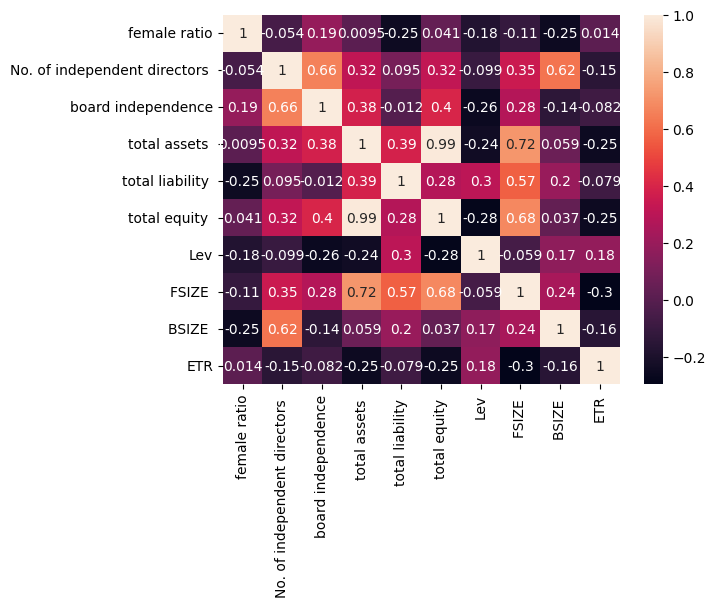

In [256]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show

print(corr_matrix['ETR'].sort_values(ascending=False))

ETR                   1.000000
Lev                   0.183692
female ratio          0.014324
board independence   -0.081907
BSIZE                -0.159482
FSIZE                -0.296283
Name: ETR, dtype: float64


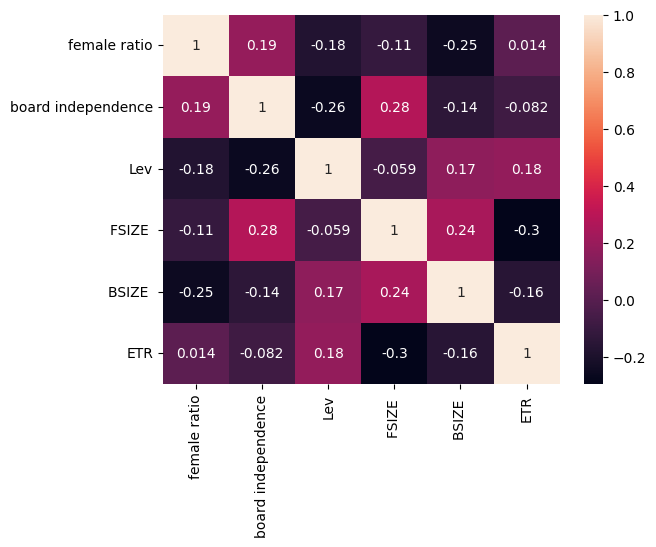

In [257]:
corr_matrix = dfl.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show

print(corr_matrix['ETR'].sort_values(ascending=False))

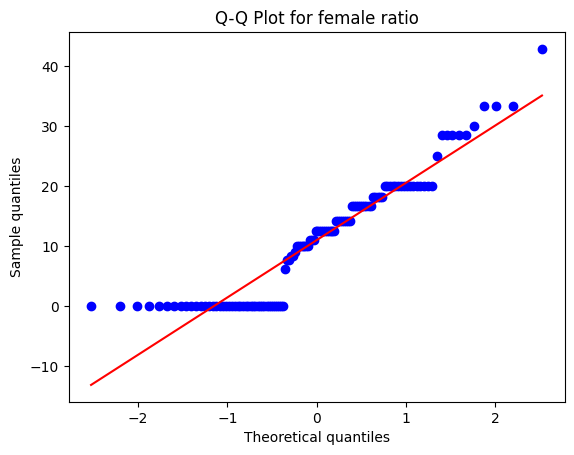

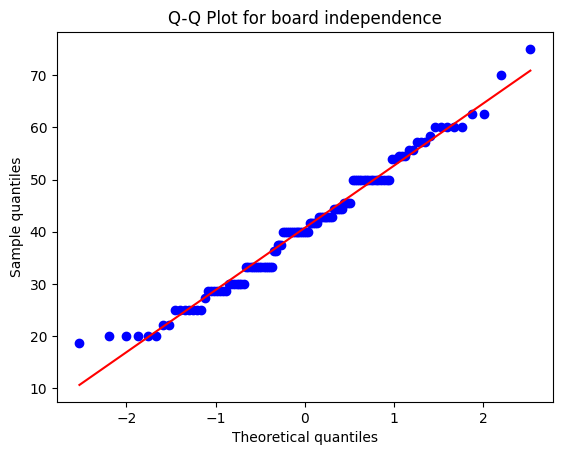

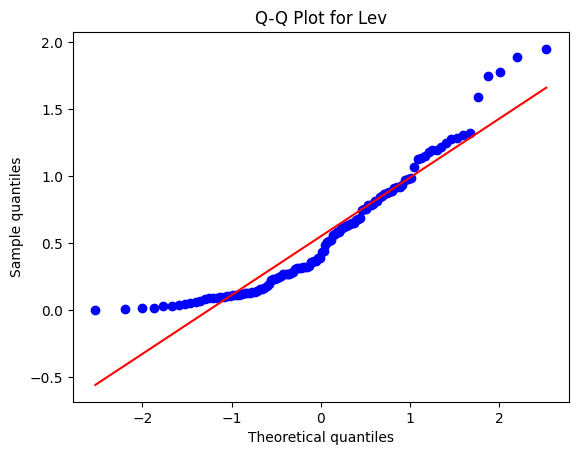

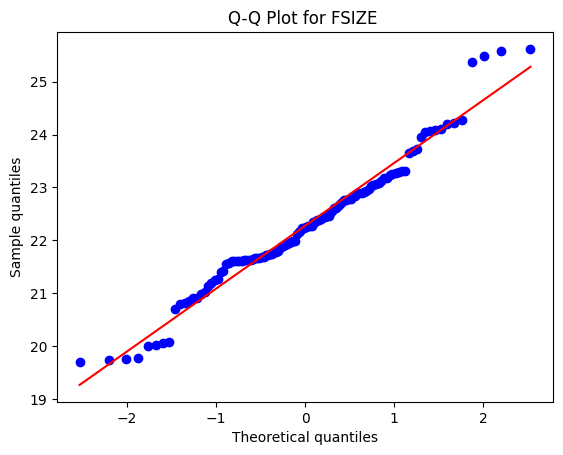

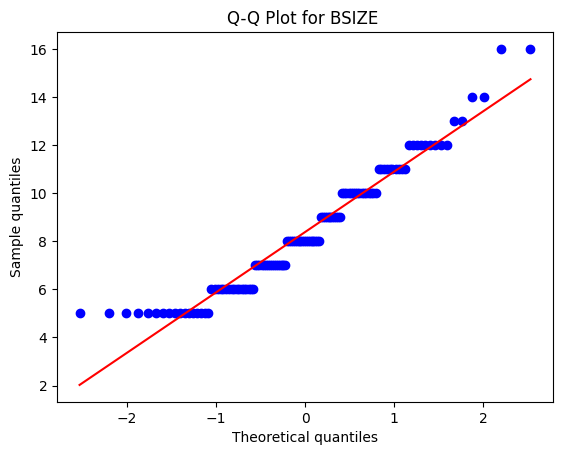

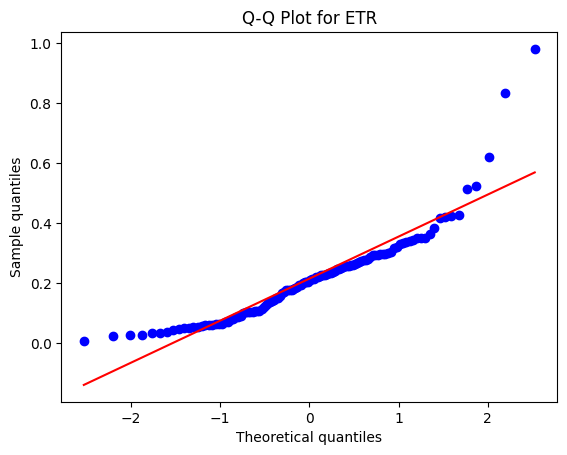

In [260]:
for column in dfl.select_dtypes(include=['float64', 'int64']):
    # Create a Q-Q plot for the current column
    stats.probplot(dfl[column], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {column}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Sample quantiles")
    plt.show()

In [259]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   female ratio        120 non-null    float64
 1   board independence  120 non-null    float64
 2   Lev                 120 non-null    float64
 3   FSIZE               120 non-null    float64
 4   BSIZE               120 non-null    int64  
 5   ETR                 120 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 5.8 KB


Here multiple linear regression is done as there is multiple independant variables. 

In [189]:
from sklearn.linear_model import LinearRegression

In [190]:
X = df.iloc[:,:-1]
y = df["ETR"]

model = LinearRegression()

model.fit(X, y)

X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ETR   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2.361
Date:                Sun, 05 May 2024   Prob (F-statistic):             0.0220
Time:                        10:26:34   Log-Likelihood:                 67.647
No. Observations:                 120   AIC:                            -117.3
Df Residuals:                     111   BIC:                            -92.21
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [191]:
X = dfl.iloc[:,:-1]
y = dfl["ETR"]

model = LinearRegression()

model.fit(X, y)

X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ETR   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     3.450
Date:                Sun, 05 May 2024   Prob (F-statistic):            0.00611
Time:                        10:27:16   Log-Likelihood:                 66.674
No. Observations:                 120   AIC:                            -121.3
Df Residuals:                     114   BIC:                            -104.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9698      0

## Results

Here I cut down on the variables which are needed.

R-Squared; 13.1%

This shows how well the data fits the model, ranging from 0 - 100% scale. In other words does a do a good job of explaining a good value.

Adj. R-Sqaured: 9.3%

This considers how well the predictors explain the ETR rating and how many predictors I am using. If this is lower the the R^2 it suggests that some of the predictors in the model may not be adding much explanatory power and could potentially be removed.

F-statistic and Prob (F-statistic): 3.450, and the associated p-value is 0.00611

Indicating that the overall model is statistically significant at a significance level of 0.05. This suggests that at least one of the independent variables has a significant effect on the dependent variable.

Pvalue : FSIZE and Lev is most significant within these variables, with a pvalue lower than 0.05. Meaning these have a significant impact on the predictor.

Coef: these will show how much of an impact they have directly to the target variable, it shows lev has a postive impact and FSIZE has a negative impact.

Ominibus and JB are normality tests, the pvalues are low which shows the residuals are not normally distrubuted. Non-normal residuals can affect the reliability of some standard tests calculated from the regression. But these arnt using it for predicting or inferential statistics, only for descriptive statistics.





Additional Normaility test which shows pvalue lower than 0.05

In [193]:
shapiro_results = shapiro(model.resid)
print("Shapiro-Wilk Test:", shapiro_results)

Shapiro-Wilk Test: ShapiroResult(statistic=0.8291587829589844, pvalue=1.7769608007256465e-10)


MC test, shows no MC

In [196]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

              feature         VIF
0               const  380.006134
1        female ratio    1.125448
2  board independence    1.233238
3                 Lev    1.106180
4              FSIZE     1.209111
5              BSIZE     1.178570


## Heteroscedasticity

Heteroscedasticity is when the standard devations of a variable monitored over a specific amount of time are non constant. This meaning a varaible can be affective to certain limit, after the limit it may not be as affective.

Then for Heteroscedasticity have high pvalues(>0.05) which is good as it shows no evidence of heteroscedasticity.

Heteroscedasticity can make it harder to trust the results of your statistical analysis. For example, in regression analysis, heteroscedasticity can lead to biased estimates of the coefficients and incorrect p-values.

It violates one of the assumptions of regression analysis, which assumes constant variance of errors across observations.

Detecting and correcting heteroscedasticity is important to ensure the validity of your statistical analysis and the reliability of your results.

In [194]:
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange Multiplier Statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange Multiplier Statistic': 3.6338523620841734, 'p-value': 0.6032377844106853, 'f-value': 0.7119925814964698, 'f p-value': 0.6156424920079702}


In [197]:
y_log = np.log(dfl["ETR"])

model = LinearRegression()

model.fit(X, y_log)

X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y_log, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ETR   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     4.827
Date:                Tue, 07 May 2024   Prob (F-statistic):           0.000486
Time:                        13:14:04   Log-Likelihood:                -131.37
No. Observations:                 120   AIC:                             274.7
Df Residuals:                     114   BIC:                             291.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.3367      1

In [198]:
# Square root transformation
X_sqrt = np.sqrt(X)
y_sqrt = np.sqrt(y)

model = LinearRegression()

model.fit(X_sqrt, y_sqrt)

X_sqrt = sm.add_constant(X_sqrt)

# Fit the multiple linear regression model
model = sm.OLS(y_sqrt, X_sqrt).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ETR   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     5.192
Date:                Tue, 07 May 2024   Prob (F-statistic):           0.000249
Time:                        18:36:11   Log-Likelihood:                 66.421
No. Observations:                 120   AIC:                            -120.8
Df Residuals:                     114   BIC:                            -104.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.9264      0